In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import leabra7.net

Text(0.5,0,'Time')

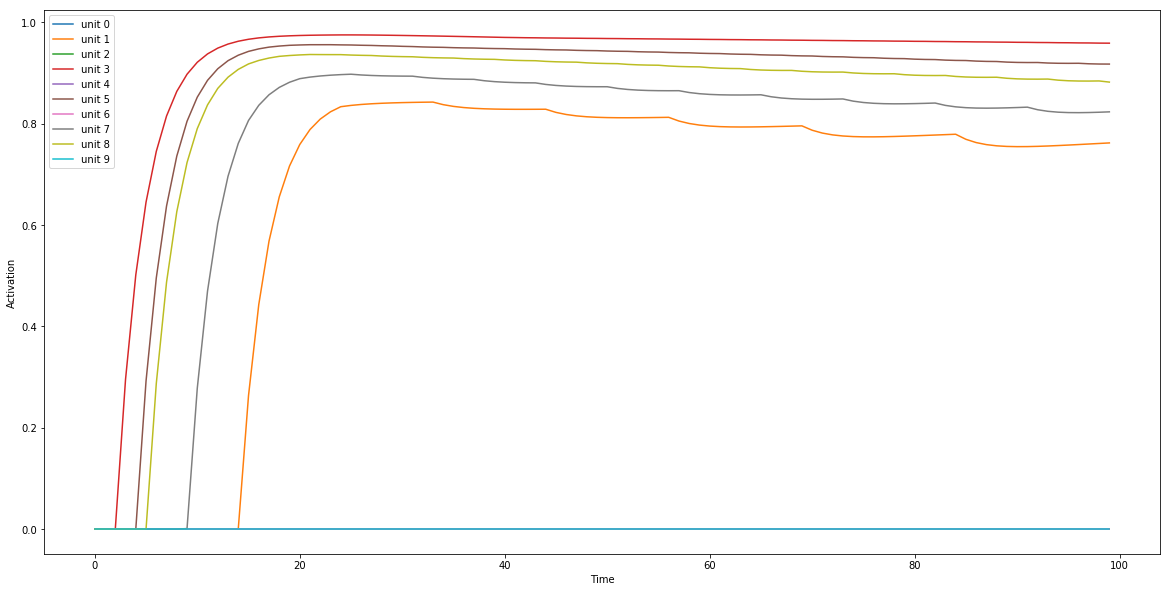

In [2]:
# Create the network
net = leabra7.net.Net()

# Set options for our layers
spec = leabra7.specs.LayerSpec(
    # For each layer, log the unit potential
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net",
                  "unit_net", "unit_gc_i", "unit_adapt",
                  "unit_spike")
)

projn_spec = leabra7.specs.ProjnSpec(dist=leabra7.rand.Gaussian(mean=0.0, var=0.5))

# Create our layers and projections
net.new_layer("input", 1, spec)
net.new_layer("output", 10, spec)
net.new_projn("proj1", "input", "output", spec=projn_spec)

# Run 200 cycles
for i in range(100):
    net.force_layer(name="input", acts=[1])
    net.cycle()

whole_log, part_log = net.logs(freq="cycle", name="output")

fig, ax = plt.subplots(figsize=(20,10))
for name, group in part_log.groupby("unit"):
    group.plot(x="time", y="act", ax=ax, label="unit " + str(name))
ax.set_ylabel("Activation")
ax.set_xlabel("Time")